# Hyperparamater tuning

### Use Ridge regression with variable alpha to find best 20 degree polynomial to fit that fits the data

In [69]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('polynomial50.csv',header = 0)

In [71]:
# Get data in arrays
x = df[['x']].values
y = df.y.values
f = df.f.values

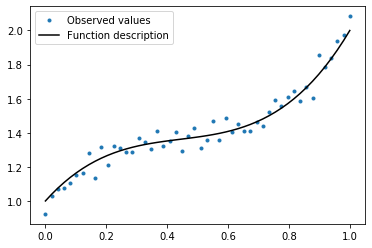

In [72]:
# Visualise the distribution
fig, ax = plt.subplots()
ax.plot(x,y, '.', label = 'Observed values')
ax.plot(x,f, 'k-', label = 'Function description')
ax.legend(loc = 'best')

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# get an index of training and validdata
itrain, ivalid= train_test_split(np.arange(len(x)), train_size = 0.8)

In [75]:
# Use the index to separate training and validdata
xtrain,ytrain = x[itrain], y[itrain]
xvalid, yvalid= x[ivalid],y[ivalid]

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [77]:
def plot_functions(d, est, ax, df, alpha, xvalid, Xvalid, xtrain, ytrain):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', label="training", ms=5, alpha=0.3)
    ax.plot(xvalid, yvalid, 's', label="validation", ms=5, alpha=0.3)
    transx=np.arange(0,1.1,0.01)
    transX = PolynomialFeatures(d).fit_transform(transx.reshape(-1,1))
    ax.plot(transx, est.predict(transX),  '.', ms=7, alpha=0.8, label="alpha = %s" % str(alpha))

    # This is just aesthetics
    ax.set_ylim((1, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')

In [78]:
def plot_coefficients(est, ax, alpha):
    coef = est.coef_.ravel()
    ax.semilogy(np.abs(coef), marker='o', label="alpha = %s" % str(alpha))
    ax.set_ylim((1e-1, 1e15))
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.legend(loc='upper left')

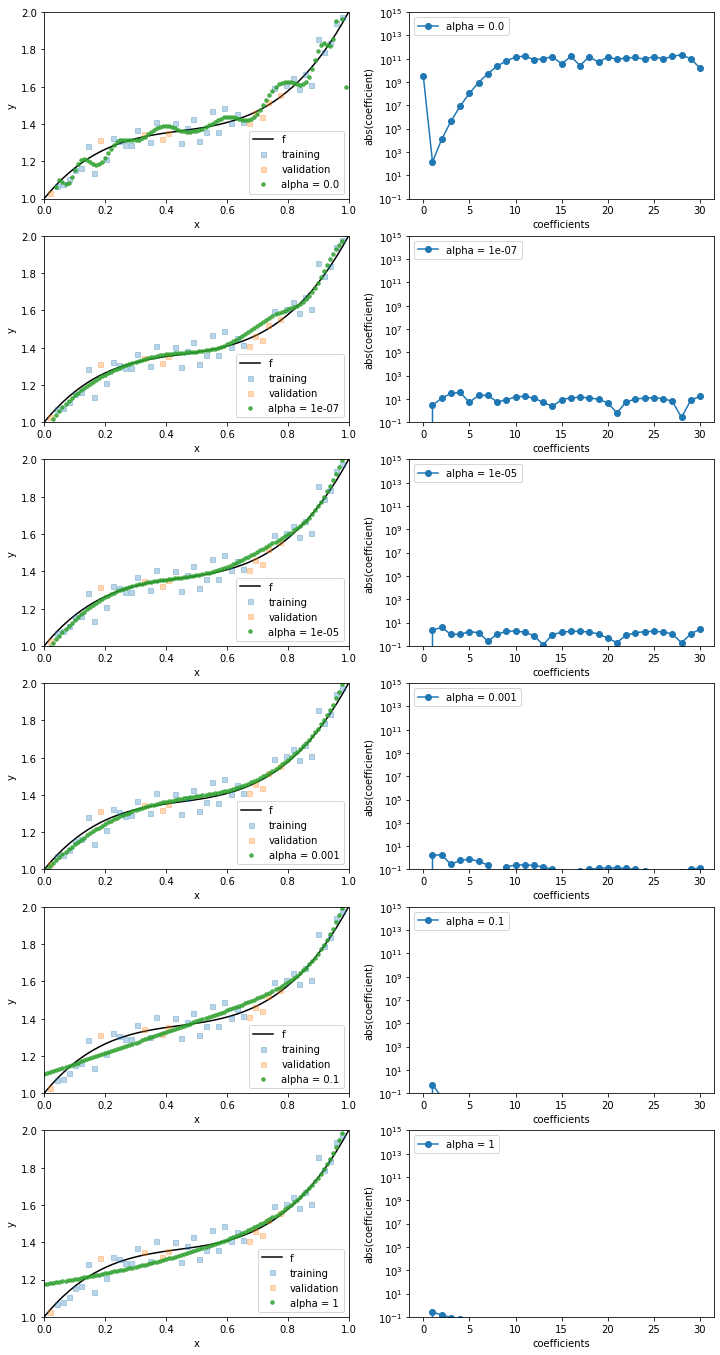

In [82]:
from sklearn.linear_model import Ridge
fig, rows = plt.subplots(6, 2, figsize=(12, 24))
d=30
alphas = [0.0, 1e-7,1e-5, 1e-3, 0.1,1]
training_error, validation_error = np.empty((2,len(alphas)))
Xtrain = PolynomialFeatures(d).fit_transform(xtrain)
Xvalid= PolynomialFeatures(d).fit_transform(xvalid)
for i, alpha in enumerate(alphas):
    l,r=rows[i]
    est = Ridge(alpha=alpha)
    est.fit(Xtrain, ytrain)
    ytrain_pred = est.predict(Xtrain)
    yvalid_pred = est.predict(Xvalid)
    training_error[i] = mean_squared_error(ytrain, ytrain_pred)
    validation_error[i] = mean_squared_error(yvalid, yvalid_pred)
    plot_functions(d, est, l, df, alpha, xvalid, Xvalid, xtrain, ytrain )
    plot_coefficients(est, r, alpha)

In [83]:
# Find the best value of d, which gives the least error on the validdata
best_d = alphas[np.argmin(validation_error)]

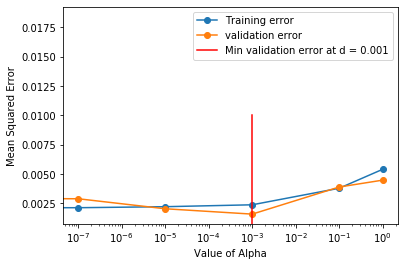

In [84]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots()
ax.plot(alphas, training_error, marker = 'o', label = 'Training error')
ax.plot(alphas, validation_error, marker = 'o', label = 'validation error')
ax.axvline(best_d, 0, 0.5, color = 'r', label = f'Min validation error at d = {best_d}')
ax.set_xlabel('Value of Alpha')
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_xscale('log')